In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
# from google.colab import output, drive
import threading

In [6]:
df = pd.read_csv('project_1_python.csv')

In [8]:
"complete records: " + str(len(df.dropna(how="any"))) + "; total records: " + str(len(df))

'complete records: 7057; total records: 180477'

## Chart 1

In [109]:
df.head(5)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [110]:
lista_pop = df['population'].unique()
lista_pop.sort()
lista_10 = lista_pop[-10:]

df_filtered = df[df['population'].isin(lista_10)]
df_filtered['location'].unique()

array(['Bangladesh', 'Brazil', 'China', 'India', 'Indonesia', 'Mexico',
       'Nigeria', 'Pakistan', 'Russia', 'United States'], dtype=object)

In [111]:
df_filtered2 = df_filtered.groupby('location').max()
df_filtered2 = df_filtered2.reset_index()
df_filtered2 = df_filtered2.sort_values(by='population', ascending=False)

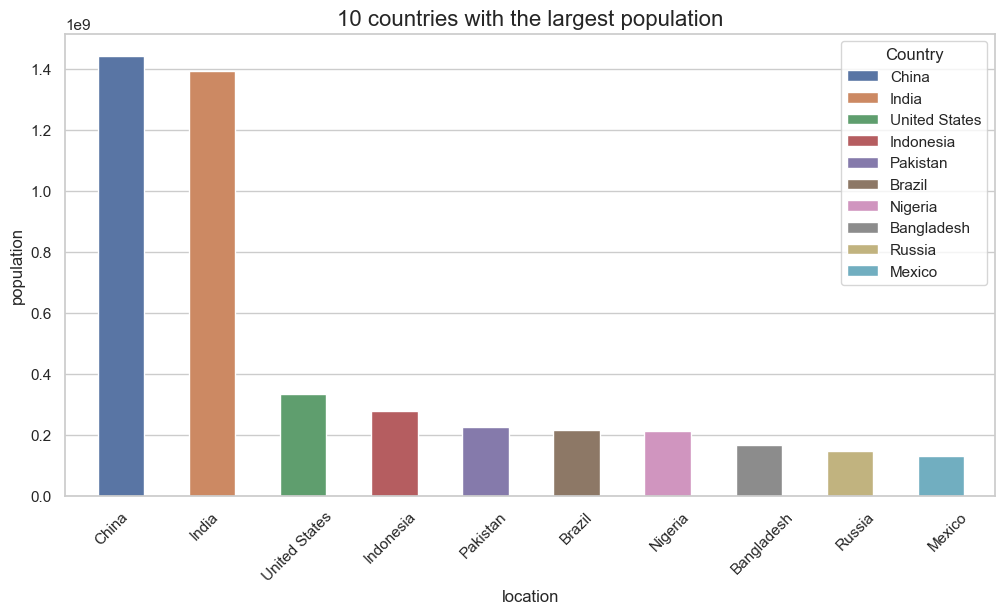

In [147]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

figure = sns.barplot(data=df_filtered2,
    x=df_filtered2["location"], 
    y=df_filtered2["population"],
    hue=df_filtered2["location"],
    width=-0.2,)

bar_width = 0.5
space = 0.5
for bar in figure.patches:
    bar.set_width(bar_width)
    bar.set_x(bar.get_x() - space / 2) 
    
figure.set_xticklabels(figure.get_xticklabels(), rotation=45)
plt.legend(title="Country")
plt.title("10 countries with the largest population", fontsize=16)

plt.show()

## Chart 2

In [152]:
df_filtered3 = df.groupby('location').max()
df_filtered3 = df_filtered3.reset_index()
df_filtered3.head(5)

,location,index,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,Afghanistan,845,AFG,Asia,2022-06-18,181574.0,3243.0,7713.0,159.0,NaN,...,5573175.0,4923085.0,NaN,6868.0,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,Albania,1690,ALB,Europe,2022-06-18,277141.0,4789.0,3497.0,21.0,NaN,...,1322864.0,1244383.0,313660.0,23655.0,2872934.0,38.0,11803.431,78.57,41.0,20.0
2,Algeria,2535,DZA,Africa,2022-06-18,265971.0,2521.0,6875.0,49.0,NaN,...,8210605.0,6851660.0,514063.0,147230.0,44616626.0,29.1,13913.839,76.88,28.0,3.0
3,Andorra,3374,AND,Europe,2022-06-18,43449.0,2313.0,155.0,6.0,NaN,...,57880.0,53450.0,41742.0,2829.0,77354.0,NaN,NaN,83.73,42.5,1.6
4,Angola,4195,AGO,Africa,2022-06-18,99761.0,5035.0,1900.0,30.0,NaN,...,12700926.0,6811268.0,512820.0,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5


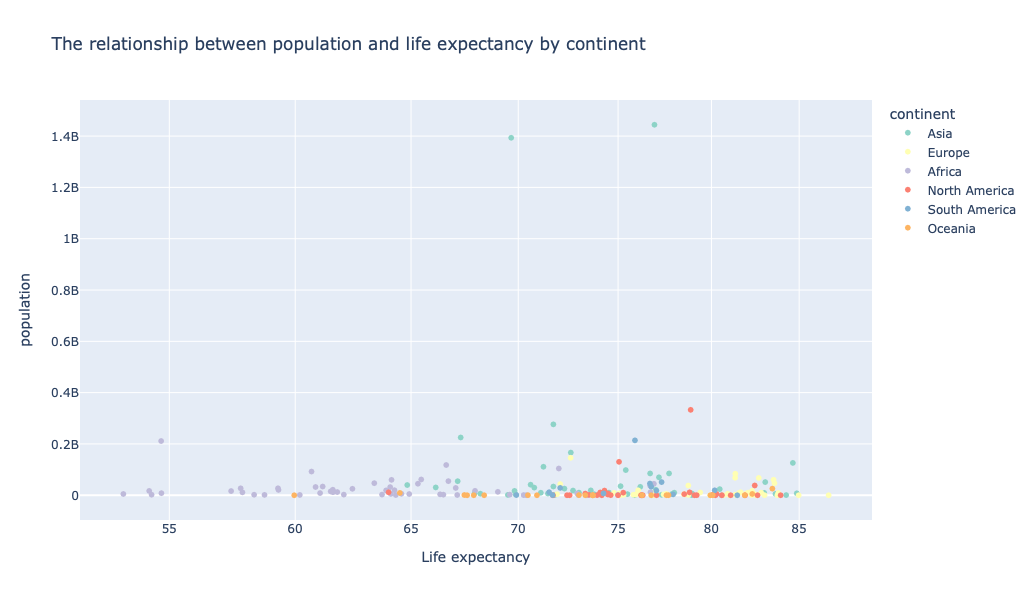

In [158]:
fig = px.scatter(df_filtered3,
                 x='life_expectancy',
                 y='population',
                 color='continent',  # Kolorowanie według kontynentu
                 size_max=50,
                 title='The relationship between population and life expectancy by continent',
                 color_discrete_sequence=px.colors.qualitative.Set3, 
                 log_x = True,
                 width = 1000,
                 height = 600
                 )

fig.update_xaxes(type='log', title='Life expectancy')
fig.update_layout(xaxis=dict(type='log'))

fig.show()

## Chart 3

In [46]:
df_filtered4 = df[df['location'].isin(['United States','Poland'])]

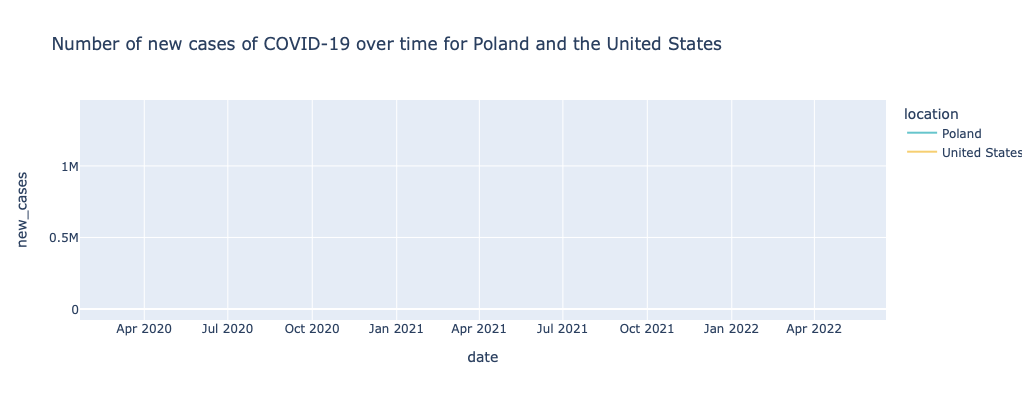

In [160]:
fig = px.line(
  df_filtered4,
  x="date",
  y="new_cases",
  color="location",
  title='Number of new cases of COVID-19 over time for Poland and the United States',
  color_discrete_sequence=px.colors.qualitative.Pastel,
  height = 400,
)
fig.show()


## Map 1

In [161]:
df_2 = df.groupby('location').max()
df_2['cases_per_person'] = df_2['total_cases'] / df_2['population']

In [162]:
df3 = df_2[df_2['total_cases'].notnull()]
df3 = df3.reset_index()

In [50]:
my_mapbox_token = 'paste-token-here'
px.set_mapbox_access_token(my_mapbox_token)

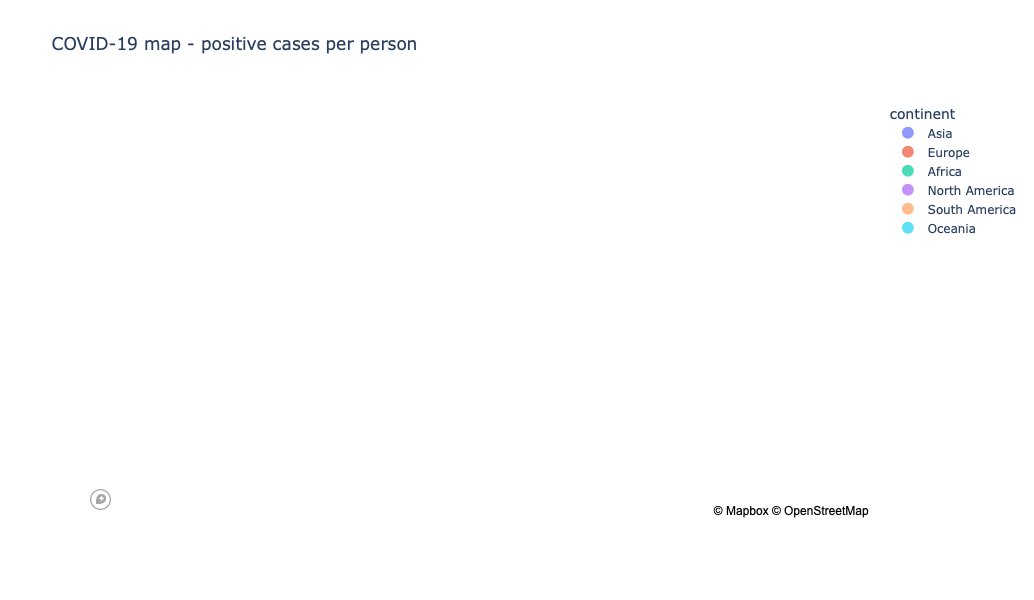

In [53]:

cases_map = px.scatter_mapbox(data_frame=df3,
                                  lat='latitude', lon='longitude',
                                  color='continent',
                                  size='cases_per_person',
                                  size_max=20,
                                  hover_data={'location': True,
                                              'total_cases': True,
                                              'continent': False,
                                              'cases_per_person': False,
                                              'latitude': False,
                                              'longitude': False,
                                              },
                                  zoom=1,
                                  mapbox_style='dark',
                                  title='COVID-19 map - positive cases per person',
                             height = 600,
                             width = 1000)
cases_map


# Dashboard 1

In [69]:
import threading
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from IPython.display import IFrame

df_dash_1 = df

countries_list = list(df_dash_1['location'].drop_duplicates())

In [70]:
first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
                                  html.Div([
                                                  html.H1(id='title', children = 'COVID-19 Tracker')
                                                  ]),

                                  html.P("Choose country:"),

                                  dcc.Dropdown(
                                                  id='country',
                                                  options=[{'value': str(country), 'label': country}
                                                          for country in countries_list],
                                                  value=countries_list[0]
                                                  ),
                                  html.Br(),

                                  html.Div(children=[
                                                  dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
                                                  dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'}),
                                                  ])

])



In [71]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig


In [72]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [73]:
# edycja tytułu
@first_dash_app.callback(
    Output(component_id='title', component_property='children'),
    Input(component_id='country', component_property='value')
)
def generate_title(country):
    children = f'Cummulative number of positive cases in {country}'
    return children


In [77]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
# IFrame(src=f'http://localhost:8050', width=1000, height=600)

# Dashboard 2

In [78]:
from dash import dcc
df_dash_2 = df3
df_dash_2 = df_dash_2.reset_index()

In [79]:
df_dash_2['date'].max()

'2022-06-18'

In [80]:
df_dash_2.columns

Index(['level_0', 'location', 'index', 'iso_code', 'continent', 'date',
       'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'hosp_patients', 'total_tests', 'new_tests', 'tests_per_case',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'total_boosters', 'new_vaccinations', 'population', 'median_age',
       'gdp_per_capita', 'life_expectancy', 'latitude', 'longitude',
       'cases_per_person'],
      dtype='object')

In [64]:
my_mapbox_token = 'paste-token-here'
px.set_mapbox_access_token(my_mapbox_token)

In [87]:
df_dash_2 = df[df['date'] == df['date'].max()].fillna(0)

metric_dict = {'total_cases': 'Total cases',
               'total_deaths': 'Total deaths',
               'total_tests': 'Total tests',
               'total_vaccinations': 'Total vaccinations',
               'people_fully_vaccinated': 'Number of fully vaccinated people'}

continent_list = list(df_dash_2['continent'].drop_duplicates())

In [88]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent',
        options=[{'value': str(continent), 'label': continent}
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric',
        options=[{'value': metric, 'label': metric_label}
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])

])


In [89]:
@second_dash_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_graph(continent, metric):
    df12 = df_dash_2[df_dash_2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df12,
        lat='latitude',
        lon='longitude',
        size=df12[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map


In [90]:
thread = threading.Thread(target=second_dash_app.run_server)
thread.start()


# Dashboard 3

In [91]:
import plotly.graph_objs as go

df_dash_3 = df

countries_list = list(df_dash_3['location'].drop_duplicates())

In [92]:
df_dash_3.columns

Index(['index', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'hosp_patients',
       'total_tests', 'new_tests', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'population', 'median_age', 'gdp_per_capita',
       'life_expectancy', 'latitude', 'longitude'],
      dtype='object')

In [97]:
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='slider'
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='1-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='2-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])


In [98]:
@third_dash_app.callback(
    Output(component_id='1-graph', component_property='figure'),
    [Input(component_id='slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df_dash_3['date'].max()
    df13 = df_dash_3[df_dash_3['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df13,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig


In [99]:
@third_dash_app.callback(
    Output(component_id='2-graph', component_property='figure'),
    [Input(component_id='slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df_dash_3['date'].max()
    df14 = df_dash_3[df_dash_3['date'] == max_date]
    df14['vaccination_ratio'] = df14['total_vaccinations'] / df14['population']
    df14 = df14.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df14,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig


In [106]:
thread = threading.Thread(target=third_dash_app.run_server)
thread.start()
# output.serve_kernel_port_as_window(port=8050)

/var/folders/lv/0md7gw4n2n37m2s_m_qjjpn80000gn/T/ipykernel_16643/3413959028.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lv/0md7gw4n2n37m2s_m_qjjpn80000gn/T/ipykernel_16643/3413959028.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

